## Adult Data Set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult_with_headers.csv to adult_with_headers (1).csv


In [ ]:
adult = pd.read_csv("adult_with_headers.csv")
adult.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

# Data Exploration and Preprocessing

In [ ]:
# Checking initial shape of the data set
adult.shape

(32561, 15)

In [ ]:
# Basic Exploration
print(adult.info())
print(adult.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

In [ ]:
print(adult.isnull().sum()) #--> no missing value but possibility of "?" which cannot be detected using this code

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
# So applying imputation technique
adult.replace('?', np.nan, inplace=True)

In [ ]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# checking for the number of categories in each categorical columns
adult["workclass"].value_counts() # adult["workclass"].value_counts() still shows '?' means that the replacement of '?' with np.nan did not work as expected. This is likely because the '?' might have extra spaces or other invisible characters.

Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Strip any leading or trailing whitespace characters
adult['workclass'] = adult['workclass'].str.strip()

# Replace '?' with np.nan
adult.replace('?', np.nan, inplace=True)

# Verify the replacement by checking for missing values
print(adult.isnull().sum())  # This should now show missing values in 'workclass', 'occupation', etc.

# Check the value counts again to confirm '?' is no longer present
print(adult['workclass'].value_counts())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [ ]:
# Repeating the above steps for all other columns as well
# Strip any leading or trailing whitespace characters
adult['workclass'] = adult['workclass'].str.strip()
adult['education'] = adult['education'].str.strip()
adult['marital_status'] = adult['marital_status'].str.strip()
adult['occupation'] = adult['occupation'].str.strip()
adult['relationship'] = adult['relationship'].str.strip()
adult['race'] = adult['race'].str.strip()
adult['sex'] = adult['sex'].str.strip()

# Replace '?' with np.nan
adult.replace('?', np.nan, inplace=True)

# Verify the replacement by checking for missing values
print(adult.isnull().sum())  # This should now show missing values in 'workclass', 'occupation', etc.

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64


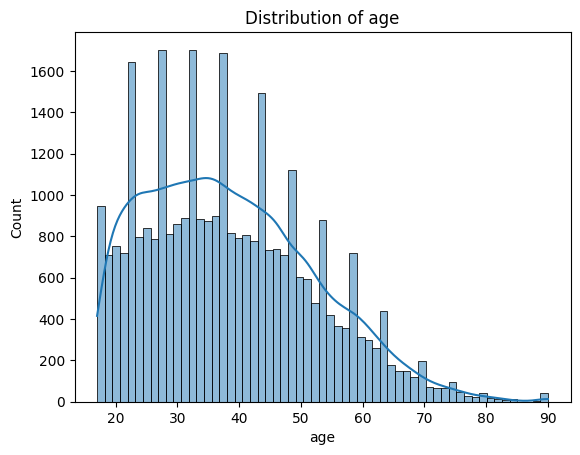

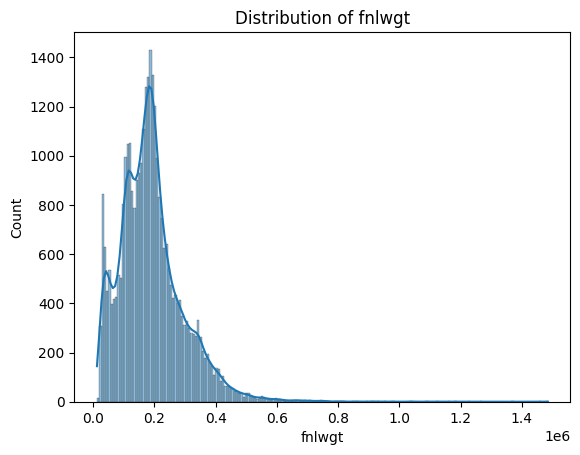

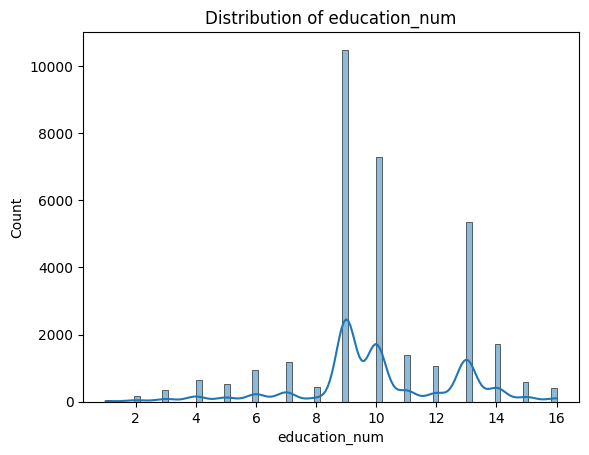

In [ ]:
# Applying scaling techniques to numerical features:

# Standard Scaling is preferred when data has outliers or a normal distribution.
# Min-Max Scaling is better for when the data is uniformly distributed or for models that are sensitive to the data range (e.g., neural networks).

# Checking the distribution of the data
import seaborn as sns
import matplotlib.pyplot as plt
num_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for feature in num_features:
    sns.histplot(adult[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
# Recommendation based on the above visuals
'''age -> Standard Scaling (Near normal distribution)
fnlwgt -> Min-Max Scaling	(Highly skewed, wide range)
education_num -> Standard Scaling (Near normal distribution)
capital_gain -> Min-Max Scaling or Log Transform (Strong positive skew with high outliers)
capital_loss -> Min-Max Scaling or Log Transform (Strong positive skew with high outliers)
hours_per_week -> Standard Scaling (Near normal distribution)'''

'age -> Standard Scaling (Near normal distribution)\nfnlwgt -> Min-Max Scaling\t(Highly skewed, wide range)\neducation_num -> Standard Scaling (Near normal distribution)\ncapital_gain -> Min-Max Scaling or Log Transform (Strong positive skew with high outliers)\ncapital_loss -> Min-Max Scaling or Log Transform (Strong positive skew with high outliers)\nhours_per_week -> Standard Scaling (Near normal distribution)'

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Defining the numerical features for each scaling technique
standard_features = ['age', 'education_num', 'hours_per_week']  # Normal distributions
minmax_features = ['fnlwgt', 'capital_gain', 'capital_loss']    # Skewed distributions

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling to normally distributed features
adult_standard_scaled = adult.copy()
adult_standard_scaled[standard_features] = standard_scaler.fit_transform(adult[standard_features])

# Apply Min-Max Scaling to skewed features
adult_minmax_scaled = adult.copy()
adult_minmax_scaled[minmax_features] = minmax_scaler.fit_transform(adult[minmax_features])

# Combine scaled data into one DataFrame
adult_scaled = adult_standard_scaled.copy()
adult_scaled[minmax_features] = adult_minmax_scaled[minmax_features]

adult_scaled.head()

# Now df_scaled has the scaled values for both normally distributed and skewed features

age         workclass    fnlwgt  education  education_num  \
0  0.030671         State-gov  0.044302  Bachelors       1.134739   
1  0.837109  Self-emp-not-inc  0.048238  Bachelors       1.134739   
2 -0.042642           Private  0.138113    HS-grad      -0.420060   
3  1.057047           Private  0.151068       11th      -1.197459   
4 -0.775768           Private  0.221488  Bachelors       1.134739   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0       0.02174           0.0       -0.035429   United-States   <=50K  
1       0.00000           0.0       -2.222153   United-States   <=50K  
2       0.00000           0.0       -0.035429   United-States   <=50K  
3       0.00000           0.0       -0.035429   United-States   <=50K  
4       0.00000           0.0       -0.035429            Cuba   <=50K

# Encoding Techniques

In [ ]:
# checking for the number of categories in each categorical columns
print(adult['workclass'].value_counts())
print(adult['education'].value_counts())
print(adult['marital_status'].value_counts())
print(adult['occupation'].value_counts())
print(adult['relationship'].value_counts())
print(adult['race'].value_counts())
print(adult['sex'].value_counts())
print(adult['native_country'].value_counts())
print(adult['income'].value_counts())
# sex and income has <5 categories and remaining columns has >5 categories

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                365

In [ ]:
# One-Hot Encoding for categorical variables with <5 categories
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder(sparse_output=False)

In [ ]:
# Fit and transform the 'sex' column
sex_encoded = OneHotEncoder.fit_transform(adult['sex'].values.reshape(-1, 1))
sex_columns = ['Male', 'Female']  # Specify the column names for sex
sex_encoded_df = pd.DataFrame(sex_encoded, columns=sex_columns, index=adult.index)

In [ ]:
# Fit and transform the 'income' column
income_encoded = OneHotEncoder.fit_transform(adult['income'].values.reshape(-1, 1))
income_columns = ['Income_<=50K', 'Income_>50K']  # Specify unique column names for income
income_encoded_df = pd.DataFrame(income_encoded, columns=income_columns, index=adult.index)

In [ ]:
# Drop the original 'sex' and 'income' columns from the dataset
adult = adult.drop(columns=['sex', 'income'])

In [ ]:
# Concatenate the original DataFrame with the new one-hot encoded columns
adult = pd.concat([adult, sex_encoded_df, income_encoded_df], axis=1)

# Sample the result
print(adult.sample())

       age workclass  fnlwgt     education  education_num marital_status  \
28821   50   Private  138852  Some-college             10       Divorced   

         occupation   relationship   race  capital_gain  capital_loss  \
28821  Craft-repair  Not-in-family  White          4650             0   

       hours_per_week  native_country  Male  Female  Income_<=50K  Income_>50K  
28821              22   United-States   0.0     1.0           1.0          0.0  


In [ ]:
# Label Encoding for categorical variables with >5 categories
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
# Apply Label Encoding to each column with more than 5 categories
adult['native_country'] = LabelEncoder.fit_transform(adult['native_country'])
adult['education'] = LabelEncoder.fit_transform(adult['education'])
adult['occupation'] = LabelEncoder.fit_transform(adult['occupation'])
adult['marital_status'] = LabelEncoder.fit_transform(adult['marital_status'])
adult['relationship'] = LabelEncoder.fit_transform(adult['relationship'])
adult['race'] = LabelEncoder.fit_transform(adult['race'])
adult['workclass'] = LabelEncoder.fit_transform(adult['workclass'])

'''label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
for col in label_cols:
    adult[col] = LabelEncoder.fit_transform(adult[col])'''

"label_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']\nfor col in label_cols:\n    adult[col] = LabelEncoder.fit_transform(adult[col])"

In [ ]:
adult.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          6   77516          9             13               4   
1   50          5   83311          9             13               2   
2   38          3  215646         11              9               0   
3   53          3  234721          1              7               2   
4   28          3  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           0             1     4          2174             0              40   
1           3             0     4             0             0              13   
2           5             1     4             0             0              40   
3           5             0     2             0             0              40   
4           9             5     2             0             0              40   

   native_country  Male  Female  Income_<=50K  Income_>50K  
0              39   0.0     1.0           1.0          0.0  
1              39   0.0     1.0           1.0          0.0  
2              39   0.0     1.0           1.0          0.0  
3              39   0.0     1.0           1.0          0.0  
4               5   1.0     0.0           1.0          0.0

In [ ]:
# Pros and cons:
# One-Hot Encoding: Pros - avoids ordinal relationships; Cons - lead to the "curse of dimensionality".
# Label Encoding: Pros - simple, low dimensionality; Cons - can imply ordinal relationships even when none exist.

# Feature Engineering

In [ ]:
#Feature 1: Work-Education Interaction
'''Rationale: Certain job roles (workclass) might require higher education levels, and the combination of both factors can affect an individual’s income.
For example, a "Manager" role combined with "Masters" education might have a higher income potential than a "Clerk" with "High School" education.
This interaction feature can capture the combined effect of work and education on income prediction.'''

adult['workclass_education_interaction'] = adult['workclass'] * adult['education']
adult.sample(5)

age  workclass  fnlwgt  education  education_num  marital_status  \
306     26          3  193945          7             12               4   
4823    34          3  424988         11              9               2   
28138   33          8  289046         11              9               0   
1400    40          3  260696         11              9               4   
16169   58          3  267663          5              4               2   

       occupation  relationship  race  capital_gain  capital_loss  \
306            12             1     4             0             0   
4823            2             0     4             0             0   
28138          14             1     2             0          1741   
1400            0             1     4             0             0   
16169          13             0     4             0             0   

       hours_per_week  native_country  Male  Female  Income_<=50K  \
306                45              39   0.0     1.0           1.0   
4823               45              39   0.0     1.0           1.0   
28138              40              39   0.0     1.0           1.0   
1400               40              39   1.0     0.0           1.0   
16169              40              26   0.0     1.0           1.0   

       Income_>50K  workclass_education_interaction  
306            0.0                               21  
4823           0.0                               33  
28138          0.0                               88  
1400           0.0                               33  
16169          0.0                               15

In [ ]:
# Feature 2: Marital Status and Relationship Grouping
'''Rationale: The combination of marital status and relationship status could provide additional insights into income.
For example, being "Married" and "Husband" may indicate a stable household, which could correlate with higher income potential.
A combined feature could capture this relationship.'''

adult['marital_relationship_interaction'] = adult['marital_status'] * adult['relationship']
adult.sample(5)

age  workclass  fnlwgt  education  education_num  marital_status  \
10884   45          3  189225         11              9               4   
28137   49          3  209146         11              9               2   
19099   35          3  186035          8             11               4   
25354   65          3   89681         12             14               4   
19874   53          1  321770         11              9               3   

       occupation  relationship  race  capital_gain  capital_loss  \
10884           7             4     2             0             0   
28137          13             0     4             0             0   
19099          12             1     4             0             0   
25354           9             1     4             0             0   
19874          13             2     4             0             0   

       hours_per_week  native_country  Male  Female  Income_<=50K  \
10884              40              39   1.0     0.0           1.0   
28137              40              39   0.0     1.0           1.0   
19099              40              39   0.0     1.0           1.0   
25354              99              39   0.0     1.0           1.0   
19874              35              39   1.0     0.0           1.0   

       Income_>50K  workclass_education_interaction  \
10884          0.0                               33   
28137          0.0                               33   
19099          0.0                               24   
25354          0.0                               36   
19874          0.0                               11   

       marital_relationship_interaction  
10884                                16  
28137                                 0  
19099                                 4  
25354                                 4  
19874                                 6

In [ ]:
# Handling Skewed Numerical Feature - Capital Gain
'''Log Transformation on Capital Gain
Rationale: capital_gain is typically right-skewed because most individuals in the dataset might have zero or very low capital gains, while a few individuals have disproportionately high capital gains.
A log transformation can make the distribution more normal, which is generally better for models like linear regression, as it assumes normality.'''

adult["log_capital_gain"] = np.log1p(adult["capital_gain"])
adult.sample(5)

age  workclass  fnlwgt  education  education_num  marital_status  \
3754    46          5  236852          9             13               2   
27950   42          3   20809         11              9               0   
9761    37          1  218490         11              9               2   
13997   48          3   25468         12             14               0   
29008   41          3  191451         12             14               0   

       occupation  relationship  race  capital_gain  capital_loss  \
3754           11             0     4             0             0   
27950           2             1     4             0             0   
9761           10             0     4          7688             0   
13997           3             1     4         99999             0   
29008           3             4     2             0             0   

       hours_per_week  native_country  Male  Female  Income_<=50K  \
3754               45              39   0.0     1.0           0.0   
27950              75              39   0.0     1.0           0.0   
9761               35              39   0.0     1.0           0.0   
13997              50              39   0.0     1.0           0.0   
29008              60              39   1.0     0.0           0.0   

       Income_>50K  workclass_education_interaction  \
3754           1.0                               45   
27950          1.0                               33   
9761           1.0                               11   
13997          1.0                               36   
29008          1.0                               36   

       marital_relationship_interaction  log_capital_gain  
3754                                  0          0.000000  
27950                                 0          0.000000  
9761                                  0          8.947546  
13997                                 0         11.512925  
29008                                 0          0.000000

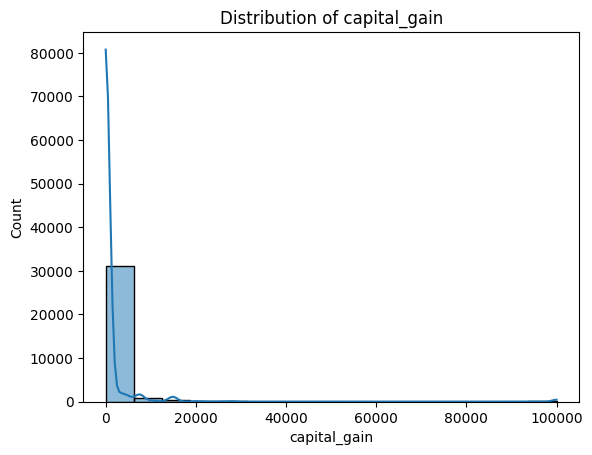

In [ ]:
sns.histplot(adult["capital_gain"], kde=True)
plt.title(f'Distribution of capital_gain')
plt.show()

In [ ]:
sns.histplot(adult["log_capital_gain"], kde=True)
plt.title(f'Distribution of log_capital_gain')
plt.show()
# graph shows better distribution than previous

Outlier Detection and Removal using Isolation Forest

In [ ]:
# Outliers can significantly impact the performance of machine learning models by distorting the learned relationships between features. They may:

'''Skew the model: Models like linear regression or logistic regression are sensitive to outliers. A few extreme values can dominate the fit, leading to poor generalization on unseen data.
Increase error rates: In classification or regression tasks, outliers may lead to incorrect predictions as they are treated as part of the normal data distribution.
Impact feature scaling: Outliers may affect how features are scaled (e.g., MinMaxScaler), leading to poor model performance.'''

'Skew the model: Models like linear regression or logistic regression are sensitive to outliers. A few extreme values can dominate the fit, leading to poor generalization on unseen data.\nIncrease error rates: In classification or regression tasks, outliers may lead to incorrect predictions as they are treated as part of the normal data distribution.\nImpact feature scaling: Outliers may affect how features are scaled (e.g., MinMaxScaler), leading to poor model performance.'

In [ ]:
from sklearn.ensemble import IsolationForest

# Select only numerical features for outlier detection
X = adult.select_dtypes(include=[int, float])

In [ ]:
# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # contamination = proportion of outliers
adult['anomaly'] = iso_forest.fit_predict(X)  # Fit the Isolation Forest

In [ ]:
# Identify normal instances (anomaly = 1) and outliers (anomaly = -1)
normal_data = adult[adult['anomaly'] == 1]  # Keep only normal instances

In [ ]:
# Drop the anomaly column after filtering out outliers
normal_data = normal_data.drop(columns=['anomaly'])

In [ ]:
print("Original dataset shape:", adult.shape)
print("Dataset shape after removing outliers:", normal_data.shape)

Original dataset shape: (32561, 21)
Dataset shape after removing outliers: (30933, 20)


In [ ]:
# Find duplicated rows
adult[adult.duplicated()]

age  workclass  fnlwgt  education  education_num  marital_status  \
4881    25          3  308144          9             13               4   
5104    90          3   52386         15             10               4   
9171    21          3  250051         15             10               4   
11631   20          3  107658         15             10               4   
13084   25          3  195994          3              2               4   
15059   21          3  243368         13              1               4   
17040   46          3  173243         11              9               2   
18555   30          3  144593         11              9               4   
18698   19          3   97261         11              9               4   
21318   19          3  138153         15             10               4   
21490   19          3  146679         15             10               4   
21875   49          3   31267          5              4               2   
22300   25          3  195994          3              2               4   
22367   44          3  367749          9             13               4   
22494   49          5   43479         15             10               2   
25872   23          3  240137          4              3               4   
26313   28          3  274679         12             14               4   
28230   27          3  255582         11              9               4   
28522   42          3  204235         15             10               2   
28846   39          3   30916         11              9               2   
29157   38          3  207202         11              9               2   
30845   46          3  133616         15             10               0   
31993   19          3  251579         15             10               4   
32404   35          3  379959         11              9               0   

       occupation  relationship  race  capital_gain  ...  hours_per_week  \
4881            2             1     4             0  ...              40   
5104            7             1     1             0  ...              35   
9171            9             3     4             0  ...              10   
11631          12             1     4             0  ...              10   
13084           8             1     4             0  ...              40   
15059           4             1     4             0  ...              50   
17040           2             0     4             0  ...              40   
18555           7             1     2             0  ...              40   
18698           4             1     4             0  ...              40   
21318           0             3     4             0  ...              10   
21490           3             3     2             0  ...              30   
21875           2             0     4             0  ...              40   
22300           8             1     4             0  ...              40   
22367           9             1     4             0  ...              45   
22494           2             0     4             0  ...              40   
25872           5             1     4             0  ...              55   
26313           9             1     4             0  ...              50   
28230           6             1     4             0  ...              40   
28522           9             0     4             0  ...              40   
28846           2             0     4             0  ...              40   
29157           6             0     4             0  ...              48   
30845           0             4     4             0  ...              40   
31993           7             3     4             0  ...              14   
32404           7             1     4             0  ...              40   

       native_country  Male  Female  Income_<=50K  Income_>50K  \
4881               26   0.0     1.0           1.0          0.0   
5104               39   0.0     1.0           1.0          0.0   
9171               39   1.0     

In [ ]:
# finding no of duplicated rows ---> 24
adult[adult.duplicated()].shape

(24, 21)

In [ ]:
normal_data[normal_data.duplicated()].shape

(24, 20)

Feature Relationships using PPS (Predictive Power Score)

In [ ]:
# PPS measures the predictive strength of a feature to predict another feature.
# Unlike the correlation matrix (which measures linear relationships), PPS can capture both linear and non-linear relationships between features, making it more flexible.

In [ ]:
# install the ppscore package
!pip install ppscore

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.1 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=917c902df493177f9151b4da9ba1cc51c3673f1536792b5ad40e82e0d3bc83a8
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
  Created wheel for command: filename=Command-0.1.0-py3-none-any.whl size=6410 sha256=74caa1d9b0119cb3bf09fa581ba3800a91b117889a2771661d15ce150a3f5c39
  Stored in directory: /root/.cache/pip/wheels/6c/b8/cc/8c02c7085edb6f28dd96e85d2831fd534c53eeaf112aa6a444
Successfully built ppscore command
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [ ]:
# Import the library
import ppscore as pps

In [ ]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(normal_data)

In [ ]:
# Display the results
print(pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10))

                  x               y  ppscore
0               age             age      1.0
42           fnlwgt          fnlwgt      1.0
64        education   education_num      1.0
83    education_num       education      1.0
84    education_num   education_num      1.0
105  marital_status  marital_status      1.0
126      occupation      occupation      1.0
147    relationship    relationship      1.0
168            race            race      1.0
189    capital_gain    capital_gain      1.0


In [ ]:
# Filter out self-predicting pairs
filtered_pps_matrix = pps_matrix[pps_matrix['x'] != pps_matrix['y']]

In [ ]:
# Display the top relationships
print(filtered_pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(20))

                                    x                                 y  \
335                       Income_>50K                      Income_<=50K   
83                      education_num                         education   
293                            Female                              Male   
64                          education                     education_num   
274                              Male                            Female   
316                      Income_<=50K                       Income_>50K   
199                      capital_gain                  log_capital_gain   
389                  log_capital_gain                      capital_gain   
343   workclass_education_interaction                         education   
344   workclass_education_interaction                     education_num   
367  marital_relationship_interaction                      relationship   
365  marital_relationship_interaction                    marital_status   
158                      

In [ ]:
# the correlation matrix
normal_data.corr()

age  workclass    fnlwgt  education  \
age                               1.000000   0.051251 -0.078760  -0.002835   
workclass                         0.051251   1.000000 -0.023302  -0.019475   
fnlwgt                           -0.078760  -0.023302  1.000000  -0.031654   
education                        -0.002835  -0.019475 -0.031654   1.000000   
education_num                     0.041089  -0.049466 -0.046224   0.349758   
marital_status                   -0.300668   0.034648  0.030895  -0.031750   
occupation                        0.003586   0.287202 -0.002087  -0.046102   
relationship                     -0.299923  -0.001668  0.008207  -0.005318   
race                              0.036127   0.037985 -0.032241   0.006466   
capital_gain                      0.087977  -0.011223 -0.012749   0.018660   
capital_loss                      0.053608  -0.016565 -0.006483   0.022762   
hours_per_week                    0.084401  -0.072523 -0.021269   0.056279   
native_country                    0.012114   0.024971 -0.058668   0.058539   
Male                             -0.110774  -0.018788 -0.027926   0.034744   
Female                            0.110774   0.018788  0.027926  -0.034744   
Income_<=50K                     -0.233534   0.057462  0.009846  -0.074651   
Income_>50K                       0.233534  -0.057462 -0.009846   0.074651   
workclass_education_interaction   0.028859   0.723499 -0.038457   0.614156   
marital_relationship_interaction -0.371756   0.026280  0.025570  -0.027057   
log_capital_gain                  0.100589  -0.015903 -0.015515   0.018660   

                                  education_num  marital_status  occupation  \
age                                    0.041089       -0.300668    0.003586   
workclass                             -0.049466        0.034648    0.287202   
fnlwgt                                -0.046224        0.030895   -0.002087   
education                              0.349758       -0.031750   -0.046102   
education_num                          1.000000       -0.060553    0.044670   
marital_status                        -0.060553        1.000000    0.048601   
occupation                             0.044670        0.048601    1.000000   
relationship                          -0.106206        0.203488   -0.025969   
race                                   0.034057       -0.072872    0.004588   
capital_gain                           0.105276       -0.064018   -0.001572   
capital_loss                           0.079553       -0.037277   -0.000342   
hours_per_week                         0.143064       -0.193735   -0.046409   
native_country                         0.056398       -0.023284    0.012080   
Male                                  -0.015080        0.135183   -0.039117   
Female                                 0.015080       -0.135183    0.039117   
Income_<=50K                          -0.316335        0.202515   -0.010813   
Income_>50K                            0.316335       -0.202515    0.010813   
workclass_education_interaction        0.194519        0.009420    0.177570   
marital_relationship_interaction      -0.122069        0.700478    0.019645   
log_capital_gain                       0.088495       -0.071273   -0.008336   

                                  relationship      race  capital_gain  \
age                                  -0.299923  0.036127      0.087977   
workclass                            -0.001668  0.037985     -0.011223   
fnlwgt                                0.008207 -0.032241     -0.012749   
education                            -0.005318  0.006466      0.018660   
education_num                        -0.106206  0.034057      0.105276   
marital_status                        0.203488 -0.072872     -0.064018   
occupation                           -0.025969  0.004588     -0.001572   
relationship                          1.000000 -0.107561     -0.126147   
race                                 -0.107561  1.000000      0.037735   


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normal_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Comparison between PPS (Predictive Power Score) matrix and correlation matrix results

### PPS Findings:
The PPS scores are mostly very high (close to 1.0) for pairs of features that have a strong predictive relationship, indicating that knowing
one feature can perfectly predict the other. Features like Income_>50K and Income_<=50K have a perfect predictive relationship with each other,
which is expected since they are complementary.

### Correlation Matrix Findings:
The correlation matrix provides numerical relationships between continuous features, but it may not capture the predictive relationships as
effectively, especially for categorical features encoded as binaries (like Male and Female). Some variables, such as education_num and education,
have a moderate correlation, indicating a relationship but not necessarily a predictive one.

## Comparison:

---



*   Strength of Relationships:
The PPS scores can show relationships that are not as obvious in the correlation matrix. For example, Female and Male have a perfect predictive
relationship in PPS but would not show up as strongly in a correlation matrix since they are categorical.
*   Interpretation of Scores:
High PPS scores (like those for interactions) indicate strong predictive power that could be used for feature selection in modeling, while
lower correlations in the matrix suggest that those features may not contribute as much to predicting the target variable.
*   Categorical vs. Continuous:
The PPS is particularly useful for understanding categorical interactions (e.g., workclass_education_interaction), which might not be
well represented in a correlation matrix that focuses more on numerical relationships.


### Conclusion

---


The PPS is better for understanding predictive relationships, especially when working with categorical features, while the correlation
matrix is useful for exploring linear relationships among continuous variables.